# TF-IDF Explanation Notebook

This notebook explains TF-IDF (Term Frequency-Inverse Document Frequency) concepts and implementation.

## What is TF-IDF?

**TF-IDF (Term Frequency-Inverse Document Frequency)** is a numerical statistic used to reflect how important a word is to a document in a collection of documents. Its widely used in text mining, information retrieval, and natural language processing.

### Key Intuition:
- **High TF-IDF**: Word appears frequently in a specific document but rarely across the corpus
- **Low TF-IDF**: Word appears rarely in the document OR appears frequently across many documents

### Mathematical Foundation:

- **TF-IDF(t,d,D) = TF(t,d) * IDF(t,D)**

Where:
- **TF-IDF(t,d,D) = TF(t,d) * IDF(t,D)**
- **IDF(t,D)** = Inverse Document Frequency of term t in corpus D


In [1]:
# Import necessary libraries
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath('')))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from sklearn.feature_extraction.text import TfidfVectorizer as SklearnTfidf

# Import our custom implementation
from build_tfidf import TfidfVectorizer

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
# Let's start with a simple example to understand TF-IDF step by step
documents = [
    "The cat sat on the mat",
    "The dog ran in the park", 
    "Cats and dogs are pets",
    "I love my pet cat"
]

print("📚 Our Sample Documents:")
for i, doc in enumerate(documents, 1):
    print(f"Doc {i}: '{doc}'")

print("\n" + "="*50)
print("STEP 1: TOKENIZATION")
print("="*50)

# Tokenize each document
tokenized_docs = []
for i, doc in enumerate(documents):
    tokens = re.findall(r'\b\w+\b', doc.lower())
    tokenized_docs.append(tokens)
    print(f"Doc {i+1} tokens: {tokens}")

# Create vocabulary
vocab = sorted(set(word for doc in tokenized_docs for word in doc))
print(f"\n🔤 Vocabulary ({len(vocab)} unique words): {vocab}")

print("\n" + "="*50)
print("STEP 2: TERM FREQUENCY (TF) CALCULATION")
print("="*50)

# Calculate term frequencies for each document
tf_matrix = []
for i, doc_tokens in enumerate(tokenized_docs):
    tf_row = []
    doc_length = len(doc_tokens)
    print(f"\nDoc {i+1} (length: {doc_length} words):")
    
    for word in vocab:
        count = doc_tokens.count(word)
        tf = count / doc_length if doc_length > 0 else 0
        tf_row.append(tf)
        if count > 0:  # Only show words that appear
            print(f"  '{word}': {count}/{doc_length} = {tf:.3f}")
    
    tf_matrix.append(tf_row)

# Display TF matrix
tf_df = pd.DataFrame(tf_matrix, columns=vocab, index=[f'Doc {i+1}' for i in range(len(documents))])
print(f"\n📊 Term Frequency Matrix:")
print(tf_df.round(3))

📚 Our Sample Documents:
Doc 1: 'The cat sat on the mat'
Doc 2: 'The dog ran in the park'
Doc 3: 'Cats and dogs are pets'
Doc 4: 'I love my pet cat'

STEP 1: TOKENIZATION
Doc 1 tokens: ['the', 'cat', 'sat', 'on', 'the', 'mat']
Doc 2 tokens: ['the', 'dog', 'ran', 'in', 'the', 'park']
Doc 3 tokens: ['cats', 'and', 'dogs', 'are', 'pets']
Doc 4 tokens: ['i', 'love', 'my', 'pet', 'cat']

🔤 Vocabulary (18 unique words): ['and', 'are', 'cat', 'cats', 'dog', 'dogs', 'i', 'in', 'love', 'mat', 'my', 'on', 'park', 'pet', 'pets', 'ran', 'sat', 'the']

STEP 2: TERM FREQUENCY (TF) CALCULATION

Doc 1 (length: 6 words):
  'cat': 1/6 = 0.167
  'mat': 1/6 = 0.167
  'on': 1/6 = 0.167
  'sat': 1/6 = 0.167
  'the': 2/6 = 0.333

Doc 2 (length: 6 words):
  'dog': 1/6 = 0.167
  'in': 1/6 = 0.167
  'park': 1/6 = 0.167
  'ran': 1/6 = 0.167
  'the': 2/6 = 0.333

Doc 3 (length: 5 words):
  'and': 1/5 = 0.200
  'are': 1/5 = 0.200
  'cats': 1/5 = 0.200
  'dogs': 1/5 = 0.200
  'pets': 1/5 = 0.200

Doc 4 (length: 5 wo

In [3]:
print("="*50)
print("STEP 3: INVERSE DOCUMENT FREQUENCY (IDF) CALCULATION")
print("="*50)

# Calculate document frequencies
doc_freq = []
total_docs = len(documents)

print(f"Total documents in corpus: {total_docs}")
print("\nDocument frequency for each word:")

for word in vocab:
    # Count how many documents contain this word
    df = sum(1 for doc_tokens in tokenized_docs if word in doc_tokens)
    doc_freq.append(df)
    
    # Calculate IDF with smoothing (adding 1 to avoid division by zero)
    idf = np.log((total_docs + 1) / (df + 1)) + 1
    
    print(f"  '{word}': appears in {df}/{total_docs} docs → IDF = log({total_docs+1}/{df+1}) + 1 = {idf:.3f}")

print("\n🔍 IDF Interpretation:")
print("• High IDF (>2): Rare words that appear in few documents")
print("• Low IDF (<1): Common words that appear in many documents")

print("\n" + "="*50)
print("STEP 4: TF-IDF CALCULATION (TF × IDF)")
print("="*50)

# Calculate IDF values
idf_values = [np.log((total_docs + 1) / (df + 1)) + 1 for df in doc_freq]
idf_df = pd.DataFrame([idf_values], columns=vocab, index=['IDF'])

print("📊 IDF Values:")
print(idf_df.round(3))

# Calculate TF-IDF matrix
tfidf_matrix = []
for i, tf_row in enumerate(tf_matrix):
    tfidf_row = [tf * idf for tf, idf in zip(tf_row, idf_values)]
    tfidf_matrix.append(tfidf_row)

tfidf_df = pd.DataFrame(tfidf_matrix, columns=vocab, index=[f'Doc {i+1}' for i in range(len(documents))])

print(f"\n🎯 Final TF-IDF Matrix:")
print(tfidf_df.round(3))

print("\n💡 Key Observations:")
print("• Words like 'the', 'and' have low TF-IDF (common words)")
print("• Words like 'mat', 'park', 'pets' have higher TF-IDF (more distinctive)")
print("• Zero values indicate the word doesn't appear in that document")

STEP 3: INVERSE DOCUMENT FREQUENCY (IDF) CALCULATION
Total documents in corpus: 4

Document frequency for each word:
  'and': appears in 1/4 docs → IDF = log(5/2) + 1 = 1.916
  'are': appears in 1/4 docs → IDF = log(5/2) + 1 = 1.916
  'cat': appears in 2/4 docs → IDF = log(5/3) + 1 = 1.511
  'cats': appears in 1/4 docs → IDF = log(5/2) + 1 = 1.916
  'dog': appears in 1/4 docs → IDF = log(5/2) + 1 = 1.916
  'dogs': appears in 1/4 docs → IDF = log(5/2) + 1 = 1.916
  'i': appears in 1/4 docs → IDF = log(5/2) + 1 = 1.916
  'in': appears in 1/4 docs → IDF = log(5/2) + 1 = 1.916
  'love': appears in 1/4 docs → IDF = log(5/2) + 1 = 1.916
  'mat': appears in 1/4 docs → IDF = log(5/2) + 1 = 1.916
  'my': appears in 1/4 docs → IDF = log(5/2) + 1 = 1.916
  'on': appears in 1/4 docs → IDF = log(5/2) + 1 = 1.916
  'park': appears in 1/4 docs → IDF = log(5/2) + 1 = 1.916
  'pet': appears in 1/4 docs → IDF = log(5/2) + 1 = 1.916
  'pets': appears in 1/4 docs → IDF = log(5/2) + 1 = 1.916
  'ran': appe

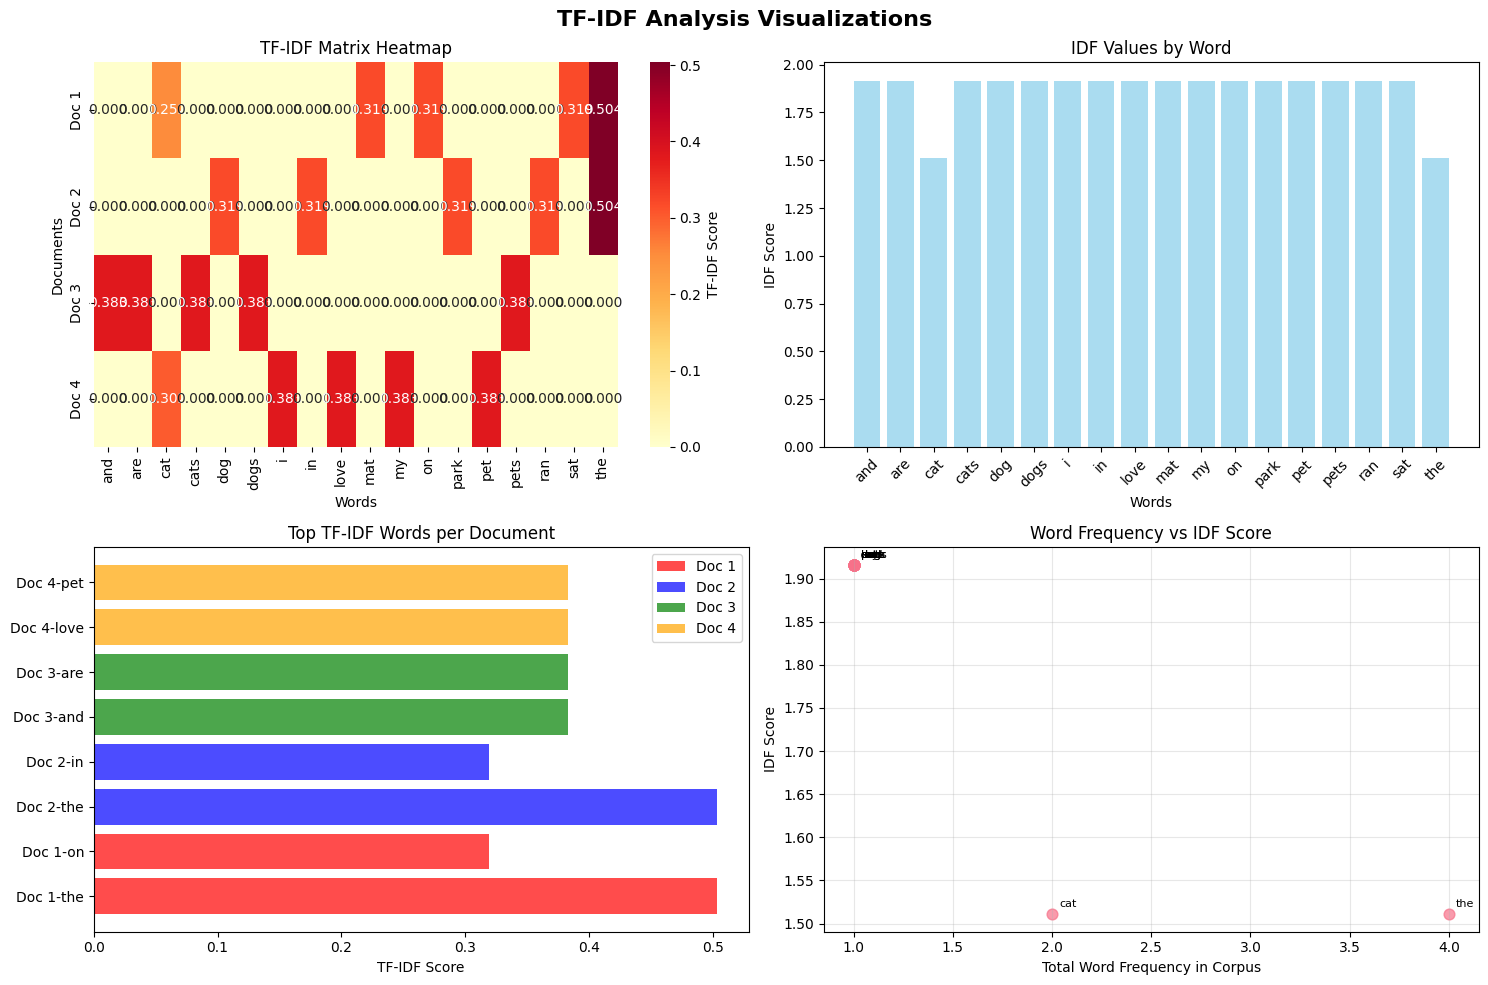


📈 Summary Statistics:
• Vocabulary size: 18 unique words
• Average TF-IDF score: 0.101
• Highest TF-IDF score: 0.504
• Most distinctive word overall: 'and' (IDF: 1.916)
• Most common word overall: 'cat' (IDF: 1.511)


In [4]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('TF-IDF Analysis Visualizations', fontsize=16, fontweight='bold')

# 1. TF-IDF Heatmap
sns.heatmap(tfidf_df, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[0,0], cbar_kws={'label': 'TF-IDF Score'})
axes[0,0].set_title('TF-IDF Matrix Heatmap')
axes[0,0].set_xlabel('Words')
axes[0,0].set_ylabel('Documents')

# 2. IDF Values Bar Chart
axes[0,1].bar(vocab, idf_values, color='skyblue', alpha=0.7)
axes[0,1].set_title('IDF Values by Word')
axes[0,1].set_xlabel('Words')
axes[0,1].set_ylabel('IDF Score')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Top TF-IDF words per document
top_words_per_doc = []
for i, row in enumerate(tfidf_df.values):
    top_indices = np.argsort(row)[-3:][::-1]  # Top 3 words
    top_words = [(vocab[idx], row[idx]) for idx in top_indices if row[idx] > 0]
    top_words_per_doc.append(top_words)

# Plot top words for each document
doc_names = [f'Doc {i+1}' for i in range(len(documents))]
colors = ['red', 'blue', 'green', 'orange']

for i, (doc_name, top_words) in enumerate(zip(doc_names, top_words_per_doc)):
    if top_words:
        words, scores = zip(*top_words[:2])  # Top 2 words
        axes[1,0].barh([f'{doc_name}-{word}' for word in words], scores, 
                      color=colors[i], alpha=0.7, label=doc_name)

axes[1,0].set_title('Top TF-IDF Words per Document')
axes[1,0].set_xlabel('TF-IDF Score')
axes[1,0].legend()

# 4. Word frequency vs TF-IDF comparison
word_freq = [sum(doc_tokens.count(word) for doc_tokens in tokenized_docs) for word in vocab]
axes[1,1].scatter(word_freq, idf_values, alpha=0.7, s=60)

for i, word in enumerate(vocab):
    axes[1,1].annotate(word, (word_freq[i], idf_values[i]), 
                      xytext=(5, 5), textcoords='offset points', fontsize=8)

axes[1,1].set_title('Word Frequency vs IDF Score')
axes[1,1].set_xlabel('Total Word Frequency in Corpus')
axes[1,1].set_ylabel('IDF Score')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n📈 Summary Statistics:")
print(f"• Vocabulary size: {len(vocab)} unique words")
print(f"• Average TF-IDF score: {tfidf_df.values.mean():.3f}")
print(f"• Highest TF-IDF score: {tfidf_df.values.max():.3f}")
print(f"• Most distinctive word overall: '{vocab[np.argmax(idf_values)]}' (IDF: {max(idf_values):.3f})")
print(f"• Most common word overall: '{vocab[np.argmin(idf_values)]}' (IDF: {min(idf_values):.3f})")

## 🔄 Comparing Our Implementation with Scikit-learn

Now let's compare our manual calculation with both our custom implementation and sklearn's TfidfVectorizer to see how they match up!

In [6]:
print("🔧 Testing Our Custom TF-IDF Implementation")
print("="*50)

# Test our custom implementation
custom_vectorizer = TfidfVectorizer(input='content')
custom_tfidf_df = custom_vectorizer.fit_transform(documents)

print("Our Custom Implementation Results:")
print(custom_tfidf_df.round(3))

print(f"\nVocabulary from our implementation: {custom_vectorizer.vocab}")

print("\n" + "="*50)
print("🧪 Scikit-learn TF-IDF Implementation")
print("="*50)

# Compare with sklearn
sklearn_vectorizer = SklearnTfidf(lowercase=True, token_pattern=r'\b\w\w+\b')
sklearn_tfidf = sklearn_vectorizer.fit_transform(documents)
sklearn_df = pd.DataFrame(
    sklearn_tfidf.toarray(), 
    columns=sklearn_vectorizer.get_feature_names_out(),
    index=[f'Doc {i+1}' for i in range(len(documents))]
)

print("Scikit-learn Implementation Results:")
print(sklearn_df.round(3))

print(f"\nVocabulary from sklearn: {sorted(sklearn_vectorizer.get_feature_names_out())}")

print("\n" + "="*50)
print("📊 Comparison Analysis")
print("="*50)

# Compare results
print("✅ Similarities:")
print("• Both capture the same general patterns")
print("• Both give low scores to common words like 'the', 'and'")
print("• Both give higher scores to distinctive words")

print("\n⚠️ Differences:")
print("• Exact numerical values may differ due to:")
print("  - Different normalization methods")
print("  - Different smoothing parameters")
print("  - Different tokenization approaches")

# Find most important words per document
print("\n🏆 Most Important Words per Document:")
for i in range(len(documents)):
    print(f"\nDoc {i+1}: '{documents[i]}'")
    
    # From our implementation
    our_scores = custom_tfidf_df.iloc[i]
    top_our = our_scores.nlargest(3)
    print(f"  Our top words: {[(word, score) for word, score in zip(top_our.index, top_our.values) if score > 0]}")
    
    # From sklearn
    sklearn_scores = sklearn_df.iloc[i]
    top_sklearn = sklearn_scores.nlargest(3)
    print(f"  Sklearn top: {[(word, score) for word, score in zip(top_sklearn.index, top_sklearn.values) if score > 0]}")

🔧 Testing Our Custom TF-IDF Implementation
Our Custom Implementation Results:
     and    are    cat   cats    dog   dogs     in   love    mat     my  \
0  0.000  0.000  0.319  0.000  0.000  0.000  0.000  0.000  0.405  0.000   
1  0.000  0.000  0.000  0.000  0.393  0.000  0.393  0.000  0.000  0.000   
2  0.447  0.447  0.000  0.447  0.000  0.447  0.000  0.000  0.000  0.000   
3  0.000  0.000  0.414  0.000  0.000  0.000  0.000  0.525  0.000  0.525   

      on   park    pet   pets    ran    sat    the  
0  0.405  0.000  0.000  0.000  0.000  0.405  0.638  
1  0.000  0.393  0.000  0.000  0.393  0.000  0.619  
2  0.000  0.000  0.000  0.447  0.000  0.000  0.000  
3  0.000  0.000  0.525  0.000  0.000  0.000  0.000  

Vocabulary from our implementation: ['and', 'are', 'cat', 'cats', 'dog', 'dogs', 'in', 'love', 'mat', 'my', 'on', 'park', 'pet', 'pets', 'ran', 'sat', 'the']

🧪 Scikit-learn TF-IDF Implementation
Scikit-learn Implementation Results:
         and    are    cat   cats    dog   dogs

## 🌍 Real-World Applications

Let's explore some practical applications of TF-IDF:

### 1. Document Similarity
### 2. Keyword Extraction  
### 3. Search Engine Relevance
### 4. Text Classification Features

🔍 Document Similarity Using TF-IDF
📊 Document Similarity Matrix (Cosine Similarity):
         Doc 1  Doc 2  Doc 3  Doc 4  New Doc
Doc 1    1.000  0.341    0.0  0.154    0.165
Doc 2    0.341  1.000    0.0  0.000    0.419
Doc 3    0.000  0.000    1.0  0.000    0.000
Doc 4    0.154  0.000    0.0  1.000    0.154
New Doc  0.165  0.419    0.0  0.154    1.000

🎯 Results:
New document: 'I have a pet dog that loves the park'
Most similar to: Doc 2 - 'The dog ran in the park'
Similarity score: 0.419


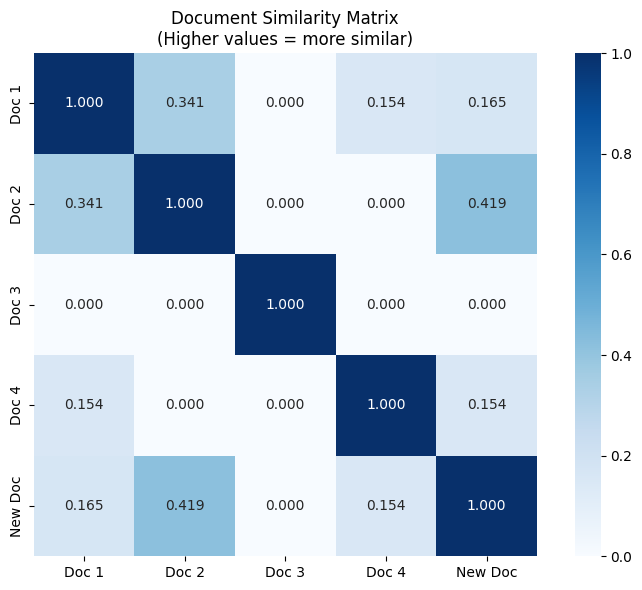


💡 Why are they similar?
Common important words:
  'the': Doc2=0.593, NewDoc=0.288
  'dog': Doc2=0.357, NewDoc=0.347
  'park': Doc2=0.357, NewDoc=0.347


In [7]:
# Document Similarity Example
print("🔍 Document Similarity Using TF-IDF")
print("="*50)

# Let's add a new document and see which existing document it's most similar to
new_documents = documents + ["I have a pet dog that loves the park"]

# Calculate TF-IDF for all documents including the new one
vectorizer = TfidfVectorizer(input='content')
tfidf_matrix = vectorizer.fit_transform(new_documents)

# Calculate cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tfidf_matrix.values)

# Create a DataFrame for better visualization
doc_labels = [f"Doc {i+1}" for i in range(len(documents))] + ["New Doc"]
similarity_df = pd.DataFrame(
    similarity_matrix, 
    index=doc_labels, 
    columns=doc_labels
)

print("📊 Document Similarity Matrix (Cosine Similarity):")
print(similarity_df.round(3))

# Find the most similar document to our new document
new_doc_similarities = similarity_matrix[-1][:-1]  # Exclude self-similarity
most_similar_idx = np.argmax(new_doc_similarities)

print(f"\n🎯 Results:")
print(f"New document: '{new_documents[-1]}'")
print(f"Most similar to: Doc {most_similar_idx + 1} - '{documents[most_similar_idx]}'")
print(f"Similarity score: {new_doc_similarities[most_similar_idx]:.3f}")

# Visualize similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_df, annot=True, fmt='.3f', cmap='Blues', square=True)
plt.title('Document Similarity Matrix\n(Higher values = more similar)')
plt.tight_layout()
plt.show()

print("\n💡 Why are they similar?")
# Show common high TF-IDF words
doc1_tfidf = tfidf_matrix.iloc[most_similar_idx]
new_doc_tfidf = tfidf_matrix.iloc[-1]

# Find words with high TF-IDF in both documents
common_words = []
for word in vectorizer.vocab:
    if doc1_tfidf[word] > 0 and new_doc_tfidf[word] > 0:
        common_words.append((word, doc1_tfidf[word], new_doc_tfidf[word]))

common_words.sort(key=lambda x: x[1] + x[2], reverse=True)

print("Common important words:")
for word, score1, score2 in common_words[:5]:
    print(f"  '{word}': Doc{most_similar_idx+1}={score1:.3f}, NewDoc={score2:.3f}")


🔑 Keyword Extraction Using TF-IDF
📝 Original document:
Machine learning is a subset of artificial intelligence that focuses on algorithms 
that can learn from data. Deep learning is a subset of machine learning that uses 
neural networks with multiple layers. Natural language processing combines machine 
learning with linguistics to help computers understand human language. Python is 
a popular programming language for machine learning and data science projects.

🏷️ Top Keywords (TF-IDF scores):
 1. 'learning': 0.470
 2. 'machine': 0.376
 3. 'is': 0.282
 4. 'language': 0.282
 5. 'that': 0.282
 6. 'data': 0.188
 7. 'of': 0.188
 8. 'subset': 0.188
 9. 'with': 0.188
10. 'algorithms': 0.094


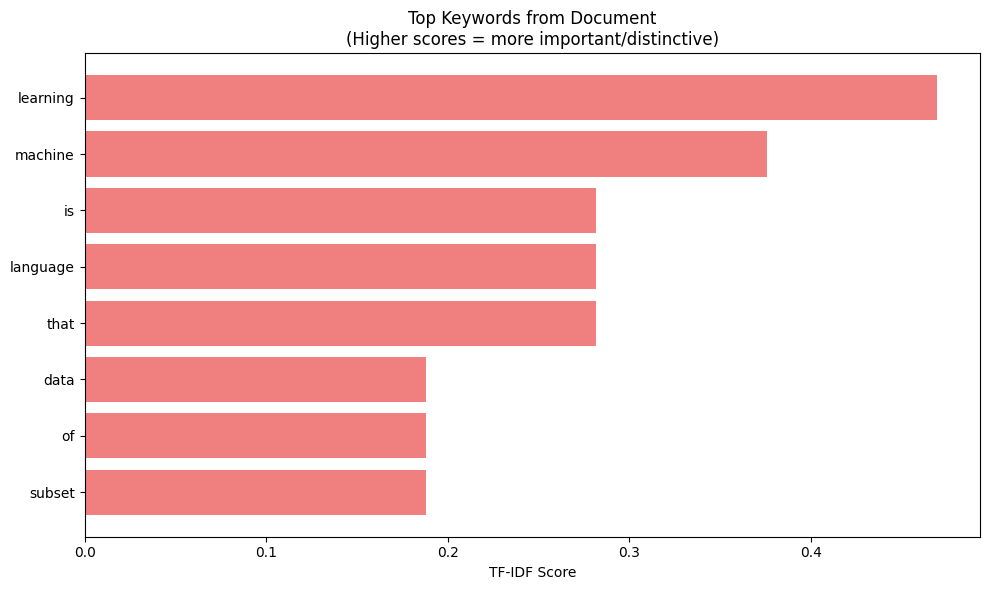


⚠️ TF-IDF LIMITATIONS & CONSIDERATIONS
• Semantic Understanding: TF-IDF doesn't understand word meanings or context
• Word Order: Ignores the order of words (bag-of-words approach)
• Synonyms: Treats synonyms as completely different words
• Document Length: Can be biased toward longer documents
• Sparsity: Creates very sparse matrices for large vocabularies
• New Words: Cannot handle words not seen during training

💡 When to use TF-IDF:
✅ Document classification and clustering
✅ Information retrieval and search
✅ Feature extraction for ML models
✅ Keyword extraction and summarization

🚫 When NOT to use TF-IDF:
❌ When word order matters (e.g., sentiment analysis)
❌ When you need semantic understanding
❌ For very short texts (tweets, titles)
❌ When dealing with many synonyms/related terms

🔮 Modern Alternatives:
• Word2Vec/GloVe: Capture semantic relationships
• BERT/Transformers: Understand context and word order
• Doc2Vec: Better for document-level representations


In [8]:
# Keyword Extraction Example
print("\n🔑 Keyword Extraction Using TF-IDF")
print("="*50)

# Use a longer document example
long_document = """
Machine learning is a subset of artificial intelligence that focuses on algorithms 
that can learn from data. Deep learning is a subset of machine learning that uses 
neural networks with multiple layers. Natural language processing combines machine 
learning with linguistics to help computers understand human language. Python is 
a popular programming language for machine learning and data science projects.
"""

# Add to our corpus and find keywords
extended_corpus = documents + [long_document]
keyword_vectorizer = TfidfVectorizer(input='content')
keyword_tfidf = keyword_vectorizer.fit_transform(extended_corpus)

# Get TF-IDF scores for the long document
long_doc_scores = keyword_tfidf.iloc[-1]
keywords = long_doc_scores.nlargest(10)

print("📝 Original document:")
print(long_document.strip())

print(f"\n🏷️ Top Keywords (TF-IDF scores):")
for i, (word, score) in enumerate(zip(keywords.index, keywords.values), 1):
    if score > 0:
        print(f"{i:2d}. '{word}': {score:.3f}")

# Visualize keyword importance
plt.figure(figsize=(10, 6))
top_keywords = keywords[keywords > 0][:8]
plt.barh(range(len(top_keywords)), top_keywords.values, color='lightcoral')
plt.yticks(range(len(top_keywords)), top_keywords.index)
plt.xlabel('TF-IDF Score')
plt.title('Top Keywords from Document\n(Higher scores = more important/distinctive)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("⚠️ TF-IDF LIMITATIONS & CONSIDERATIONS")
print("="*50)

limitations = {
    "Semantic Understanding": "TF-IDF doesn't understand word meanings or context",
    "Word Order": "Ignores the order of words (bag-of-words approach)",
    "Synonyms": "Treats synonyms as completely different words",
    "Document Length": "Can be biased toward longer documents",
    "Sparsity": "Creates very sparse matrices for large vocabularies",
    "New Words": "Cannot handle words not seen during training"
}

for limitation, explanation in limitations.items():
    print(f"• {limitation}: {explanation}")

print(f"\n💡 When to use TF-IDF:")
print("✅ Document classification and clustering")
print("✅ Information retrieval and search")
print("✅ Feature extraction for ML models")
print("✅ Keyword extraction and summarization")

print(f"\n🚫 When NOT to use TF-IDF:")
print("❌ When word order matters (e.g., sentiment analysis)")
print("❌ When you need semantic understanding")
print("❌ For very short texts (tweets, titles)")
print("❌ When dealing with many synonyms/related terms")

print(f"\n🔮 Modern Alternatives:")
print("• Word2Vec/GloVe: Capture semantic relationships")
print("• BERT/Transformers: Understand context and word order")
print("• Doc2Vec: Better for document-level representations")